#### This data will be our labeled set. Using these happy/sad tweet, we'll train a machine learning model to learn to discriminate between happy/sad automatically. Then, we'll be able to classify arbitrary unlabeled tweets as happy or sad. 0 means sad tweet and 1 means happy tweet.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Goal - To build a predictive model which will determine whether a tweet  is sad or happy.

### First we import all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')





from sklearn.metrics import accuracy_score,fbeta_score,classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize


import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords


from nltk.stem  import SnowballStemmer
ss = SnowballStemmer("english")




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load the data

In [3]:
data = pd.read_csv("/content/dataset.csv",encoding = ('ISO-8859-1'))
data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
data.shape

(99989, 3)

### this dataset  contain 99989 toal tweets(rows) and 3 columns

# remove unnecessary columns

In [5]:
data = data.drop(['ItemID'], axis = 1)
print(data.shape)
data.head()

(99989, 2)


,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


##### We dont need this Item id column for prediction so we remove  this.  After removing we get dataset shape (99989,2) now we have only 2 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      99989 non-null  int64 
 1   SentimentText  99989 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


#### This show that we have 2 column one contain only numeric value and other is objective(contain number and string both)

In [7]:
data.isnull().sum()

Sentiment        0
SentimentText    0
dtype: int64

### the dataset contain no null  or missing values.

In [8]:
data['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

#### Here we get how many tweets are happy or how many tweets are sad. we also see this in terms of percentage.

In [9]:
100*data['Sentiment'].value_counts()/len(data)

1    56.463211
0    43.536789
Name: Sentiment, dtype: float64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sentiment,99989.0,0.564632,0.495808,0.0,0.0,1.0,1.0,1.0


In [11]:
data.groupby('Sentiment').describe()

SentimentText  ...     
                  count  ... freq
Sentiment                ...     
0                 43532  ...    1
1                 56457  ...    1

[2 rows x 4 columns]

#### this shows that their are 43532 unique tweets from '0' class and 56457 unique tweets from class '1' and the top  or frequent tweet

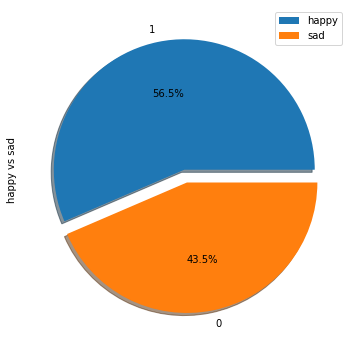

In [12]:
data["Sentiment"].value_counts().plot(kind = 'pie', explode = [0,0.1], figsize = (6,6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("happy vs sad")
plt.legend(["happy", "sad"])
plt.show()

In [13]:
data['length'] = data['SentimentText'].map(lambda text: len(text))

#### Here we insert one more column of length to check length of every tweet

In [14]:
data.head()

,Sentiment,SentimentText,length
0,0,is so sad for my APL frie...,61
1,0,I missed the New Moon trail...,51
2,1,omg its already 7:30 :O,37
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,0,i think mi bf is cheating on me!!! ...,53


In [15]:
data.length.describe()

count    99989.000000
mean        77.264309
std         36.382639
min          6.000000
25%         47.000000
50%         73.000000
75%        108.000000
max        949.000000
Name: length, dtype: float64

##### so we found the maximum length of tweet is 949 or minimum is 6

##### we just print tweet of max length

In [16]:
data[data['length'] ==949]['SentimentText'].iloc[0]

" brokeback mountain was terrible.\n8838,0,Sentiment140,# @Catherine42 I wouldn't mind but I only had 1/2 a portion &amp; then left 1/2 the cream  just fruit for me then until my hols  x\n8839,1,Sentiment140,# @DeliciousLunch ... dark chocolate cookies? oh you tease! I'm writing to day n dipping into twitter for company \n8840,1,Sentiment140,# followfriday @mstuyvenberg @feb_unsw @hazelmail @beckescreet - all almost as cool as he-man and she-ra \n8841,1,Sentiment140,# followfriday @presentsqueen because she talks sense \n8842,1,Sentiment140,# New York is the most amazing city i've ever been to \n8843,0,Sentiment140,# number times I bottomed out just in our driveway = 4... a 6.5 hour trip to mass.. I'm scared \n8844,0,Sentiment140,# of NYC celebrity street vendors &gt; # of POA celebrities  http://streetvendor.org/media/pdfs/Side2.pdf\n8845,1,Sentiment140,###### yay ##### thanks @matclayton ##### \n8846,0,Sentiment140,#$%#$^#%@ I HATE THE DENTIST"

In [17]:
data[data['length'] ==6]['SentimentText'].iloc[0]

' just '

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35bcb2fa10>,
      dtype=object)

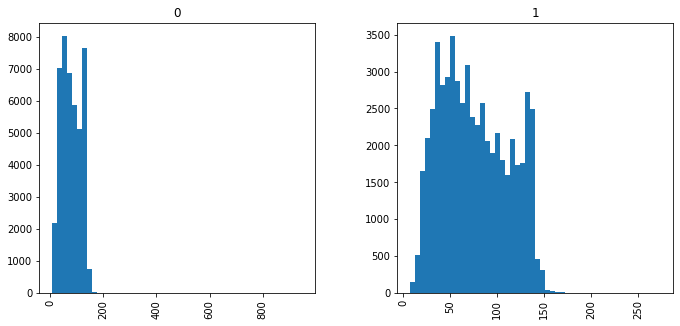

In [18]:
data.hist(column ='length',by = 'Sentiment',bins = 50,figsize = (11,5))

Text(0.5, 1.0, 'sad tweet word length')

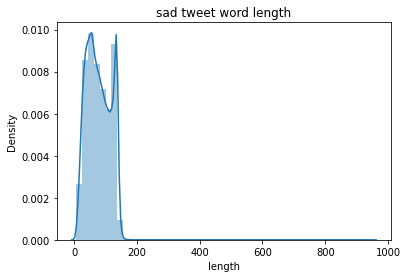

In [19]:
sns.distplot(data[data['Sentiment'] == 0]['length'])
plt.title("sad tweet word length")

Text(0.5, 1.0, 'happy tweet word length')

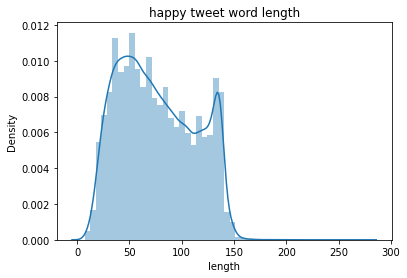

In [20]:
sns.distplot(data[data['Sentiment'] == 1]['length'])
plt.title("happy tweet word length")

#### happy tweet are more broader or lengthy than sad tweet

# Text Transformation

In [21]:
data.tail()

,Sentiment,SentimentText,length
99984,0,@Cupcake seems like a repeating problem hop...,78
99985,1,@cupcake__ arrrr we both replied to each other...,138
99986,0,@CuPcAkE_2120 ya i thought so,30
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,61
99988,1,@cupcake_kayla haha yes you do,31


In [22]:
Stop = stopwords.words("english")

#### now we clean the text by removing stop words and convert all alphabet in lower case

In [23]:
import string
def cleantext(SentimentText):
    SentimentText = re.sub('[^a-zA-Z]',' ',SentimentText)
    SentimentText = SentimentText.lower()
    SentimentText = SentimentText.split()
    words =[ss.stem(word)for word in SentimentText if word not in Stop]
    return ' '.join(words)


data['SentimentText'] = data['SentimentText'].apply(cleantext)
data.head(10)

,Sentiment,SentimentText,length
0,0,sad apl friend,61
1,0,miss new moon trailer,51
2,1,omg alreadi,37
3,0,omgaga im sooo im gunna cri dentist sinc supos...,132
4,0,think mi bf cheat,53
5,0,worri much,42
6,1,juuuuuuuuuuuuuuuuussssst chillin,41
7,0,sunni work tomorrow tv tonight,61
8,1,hand uniform today miss alreadi,53
9,1,hmmmm wonder number,46


In [24]:
data.tail()

,Sentiment,SentimentText,length
99984,0,cupcak seem like repeat problem hope abl find ...,78
99985,1,cupcak arrrr repli differ tweet time see duno ...,138
99986,0,cupcak ya thought,30
99987,1,cupcak dolli yes yes glad fun,61
99988,1,cupcak kayla haha yes,31


#### Now see we succesfully removing all sign also like @user ,# etc

In [25]:
sad_sentiment = data[data['Sentiment'] == 0]['SentimentText']
happy_sentiment = data[data['Sentiment'] == 1]['SentimentText']

In [26]:
sad_sentiment

0                                           sad apl friend
1                                    miss new moon trailer
3        omgaga im sooo im gunna cri dentist sinc supos...
4                                        think mi bf cheat
5                                               worri much
                               ...                        
99975    ctham mommyfizz cuz big bur man hahahahahahaha...
99981    cup tea foot realli bad like worst ever bare w...
99983    cupati took waaay long get messag asham right ...
99984    cupcak seem like repeat problem hope abl find ...
99986                                    cupcak ya thought
Name: SentimentText, Length: 43532, dtype: object

In [27]:
happy_sentiment

2                                              omg alreadi
6                         juuuuuuuuuuuuuuuuussssst chillin
8                          hand uniform today miss alreadi
9                                      hmmmm wonder number
11                                    thank hater face day
                               ...                        
99980                     cunningstunt afternoon jim how x
99982    cup kati fun health amp safeti switch look spr...
99985    cupcak arrrr repli differ tweet time see duno ...
99987                        cupcak dolli yes yes glad fun
99988                                cupcak kayla haha yes
Name: SentimentText, Length: 56457, dtype: object

In [28]:
happy_sentiment = data[data['Sentiment'] == 1]['SentimentText']
happy_words = []
def extractHappyWords(happyMessages):
    global happy_words
    words = [word.lower() for word in word_tokenize(happyMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    happy_words = happy_words + words
happy_sentiment.apply(extractHappyWords)       

2        None
6        None
8        None
9        None
11       None
         ... 
99980    None
99982    None
99985    None
99987    None
99988    None
Name: SentimentText, Length: 56457, dtype: object

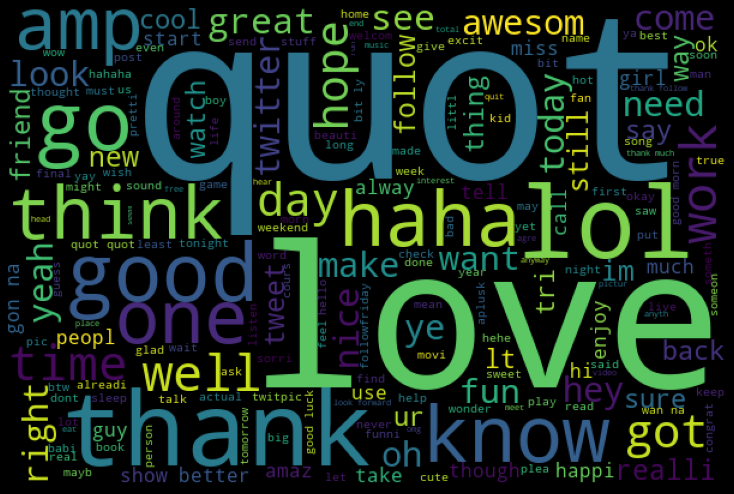

In [29]:
happy_wordcloud = WordCloud(width=600, height=400).generate(" ".join(happy_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(happy_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### This are the words which are more commonly used in happy tweets

In [30]:
sad_sentiment = data[data['Sentiment'] == 0]['SentimentText']
sad_words = []
def extractSadWords(SadMessages):
    global sad_words
    words = [word.lower() for word in word_tokenize(SadMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    sad_words = sad_words + words
sad_sentiment.apply(extractSadWords)    

0        None
1        None
3        None
4        None
5        None
         ... 
99975    None
99981    None
99983    None
99984    None
99986    None
Name: SentimentText, Length: 43532, dtype: object

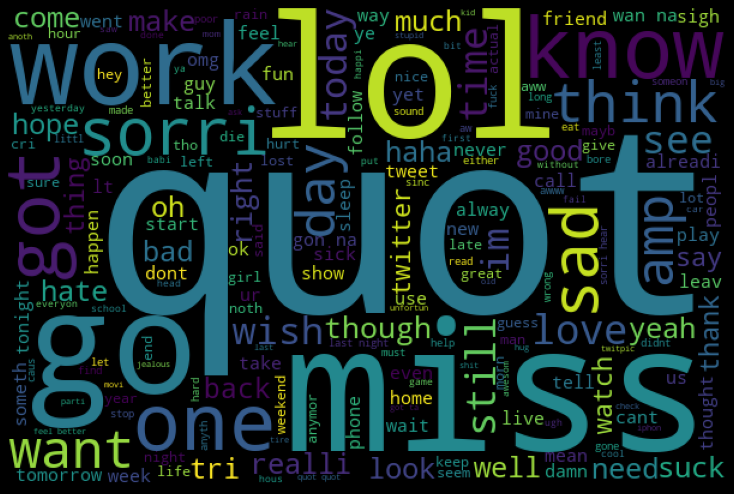

In [31]:
sad_wordcloud = WordCloud(width=600, height=400).generate(" ".join(sad_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(sad_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [32]:
happy_words = np.array(happy_words)
print("Top 10 Happy words are :\n")
pd.Series(happy_words).value_counts().head(n = 10)

Top 10 Happy words are :



quot     6300
thank    5116
good     4302
love     4182
like     3435
lol      3320
get      3311
u        3116
go       2859
know     2570
dtype: int64

In [33]:
sad_words = np.array(sad_words)
print("Top 10 Sad words are :\n")
pd.Series(sad_words).value_counts().head(n = 10)

Top 10 Sad words are :



go       3491
get      3288
quot     2970
like     2521
miss     2472
u        2289
work     2269
know     2240
lol      2094
sorri    2058
dtype: int64

#### We see that some of the words are common in both the casses (happy and sad tweets)

#### Convert our clean text into a representation that a machine learning model can understand. We will use the Tfifd for this.

In [34]:
labels = data['Sentiment']
text = data['SentimentText']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix


In [36]:
X_train, X_remain, y_train, y_remain = train_test_split(text, labels, stratify = labels, random_state=0, test_size=0.3)

X_test, X_val, y_test, y_val = train_test_split(X_remain,y_remain,stratify = y_remain, random_state = 0, test_size = 0.5)

In [37]:
print("Training Data:",X_train.shape,y_train.shape )

print("Testing Data:", X_test.shape,y_test.shape)

print("Validation Data:", X_val.shape,y_val.shape )

Training Data: (69992,) (69992,)
Testing Data: (14998,) (14998,)
Validation Data: (14999,) (14999,)


In [38]:
# create the transform
count_vec = CountVectorizer(stop_words='english')

# Learn the vocabulary dictionary and return term-document matrix.
X_train_counts = count_vec.fit_transform(X_train)


#Learn vocabulary and idf from training set.
tf_transformer = TfidfTransformer().fit(X_train_counts)

# Learn vocabulary and idf, return term-document matrix.
X_train_transformed = tf_transformer.transform(X_train_counts)

#test data
X_test_counts = count_vec.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

#converts classes into integer
labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

In [39]:
model = MultinomialNB()

clf = model.fit(X_train_transformed,y_train_lables_trf)


prediction = clf.predict(X_test_transformed)

In [40]:
print('Average accuracy on test set={}'.format(np.mean(prediction == labels.transform(y_test))))

Average accuracy on test set=0.7233631150820109


In [41]:
y_test

89641    1
78119    0
16108    0
48613    1
23058    0
        ..
94259    0
79147    0
48894    1
11629    0
61866    1
Name: Sentiment, Length: 14998, dtype: int64

here we get 72 % accuracy on our test data